In [24]:
>>> from fafbseg import flywire

In [2]:
>>> flywire.get_materialization_versions(dataset="production")

,expires_on,datastack,time_stamp,version,is_merged,id,status,valid
0,2023-10-14 04:10:00,flywire_fafb_production,2023-10-07 05:10:00,787,False,777,AVAILABLE,True
1,2023-11-01 04:10:00,flywire_fafb_production,2023-10-04 05:10:00,785,False,775,AVAILABLE,True
2,2121-11-10 07:10:00,flywire_fafb_production,2023-09-30 05:10:00,783,False,773,AVAILABLE,True
3,2023-10-18 04:10:00,flywire_fafb_production,2023-09-20 05:10:00,780,False,770,AVAILABLE,True
4,2121-11-10 07:10:00,flywire_fafb_production,2023-03-21 08:10:00,630,True,619,AVAILABLE,True
5,2121-11-10 07:10:00,flywire_fafb_production,2023-01-10 08:11:00,571,True,560,AVAILABLE,True
6,2121-11-10 07:10:00,flywire_fafb_production,2022-11-17 08:10:00,526,True,515,AVAILABLE,True
7,2121-02-18 08:10:00,flywire_fafb_production,2022-01-17 08:10:00,258,True,247,AVAILABLE,True


In [3]:
>>> flywire.get_materialization_versions(dataset="public")

,version,valid,status,is_merged,datastack,expires_on,time_stamp,id
0,630,True,AVAILABLE,True,flywire_fafb_public,2121-11-10 07:10:00,2023-03-21 08:10:00,718


In [25]:
>>> flywire.set_default_dataset("public")

Default dataset set to "public"


In [5]:
>>> syn = flywire.fetch_synapses(
...     720575940625431866, mat="auto"  # note this is the default value
... )
>>> syn.head()

Using materialization version 630


,pre,post,cleft_score,pre_x,pre_y,pre_z,post_x,post_y,post_z,id
0,720575940618561403,720575940625431866,144,479728,242036,23760,479856,242028,23760,56078503
1,720575940631121739,720575940625431866,63,475736,237908,21800,475716,237808,21760,111010940
2,720575940612003441,720575940625431866,142,437296,131392,185360,437408,131420,185400,183931595
3,720575940626518302,720575940625431866,129,485796,248296,28200,485840,248120,28280,3443470
4,720575940618654016,720575940625431866,144,348664,147136,162720,348688,147224,162720,24048637


In [8]:
>>> syn_live = flywire.fetch_synapses(
...     720575940625431866, mat="live", filtered=False, dataset="production"
... )
>>> syn_live.head()

,pre,post,cleft_score,pre_x,pre_y,pre_z,post_x,post_y,post_z,id
0,720575940614727903,720575940625431866,0,503800,205396,32840,503672,205416,32800,71828773
1,720575940644704160,720575940625431866,59,478456,250916,26160,478360,250848,26200,52298120
2,720575940631975884,720575940625431866,83,480208,244212,30080,480144,244384,30040,191440776
3,720575940613489617,720575940625431866,142,475384,235384,25960,475496,235376,25960,52231029
4,720575940617537570,720575940625431866,166,480960,242752,23840,481092,242724,23800,56078511


In [9]:
>>> # These are two root IDs for the same neuron (one old, one current)
>>> # THIS IS EXPECTED TO FAIL!
>>> syn = flywire.fetch_synapses([720575940618984129, 720575940620240833], mat="auto")

ValueError: Given root IDs do not co-exist in any of the available public materialization versions. Please make sure that the root IDs do exist and rerun your query.

In [10]:
>>> syn = flywire.fetch_synapses(720575940620240833, mat=630)
>>> syn.head()

Some root IDs were already outdated at materialization 630 and synapse/connectivity data will be inaccurrate:

 720575940620240833

Try updating the root IDs using `flywire.update_ids` or `flywire.supervoxels_to_roots` if you have supervoxel IDs, or pick a different materialization version.


,pre,post,cleft_score,pre_x,pre_y,pre_z,post_x,post_y,post_z,id


In [11]:
>>> # Search for this neuron's ID at materialization 630 (public release version)
>>> new_id = flywire.update_ids(720575940620240833, timestamp="mat_630")
>>> new_id

,old_id,new_id,confidence,changed
0,720575940620240833,720575940622894616,0.991647,True


In [12]:
>>> syn = flywire.fetch_synapses(720575940622894616)
>>> syn.head()

Using materialization version 630


,pre,post,cleft_score,pre_x,pre_y,pre_z,post_x,post_y,post_z,id
0,720575940627172100,720575940622894616,142,384712,159552,184160,384840,159424,184200,166252986
1,720575940634147936,720575940622894616,135,386928,156476,181800,386904,156556,181840,155850631
2,720575940626247823,720575940622894616,57,367340,152124,191000,367304,152136,191040,63922583
3,720575940632826925,720575940622894616,144,341452,147360,173040,341424,147504,173040,228310877
4,720575940624632247,720575940622894616,145,358000,145404,163080,357864,145396,163080,87457018


In [27]:
>>> # Fetch a skeleton 
>>> sk = flywire.get_skeletons(720575940625431866)
>>> # The skeleton does not yet have any synapse data associated with it
>>> sk.connectors

In [28]:
>>> flywire.fetch_synapses(sk, attach=True)
>>> # Now the neuron has a connector table 
>>> sk.connectors.head()

Using materialization version 630


,connector_id,x,y,z,cleft_score,partner_id,type,node_id
0,0,378580,141040,176720,151,720575940486790143,pre,224
1,1,448544,121840,192120,161,720575940617293396,pre,473
2,2,449832,122628,195640,157,720575940659323009,pre,479
3,3,370232,146616,170080,139,720575940627720360,pre,200
4,4,361652,129832,159520,61,720575940532780653,pre,181


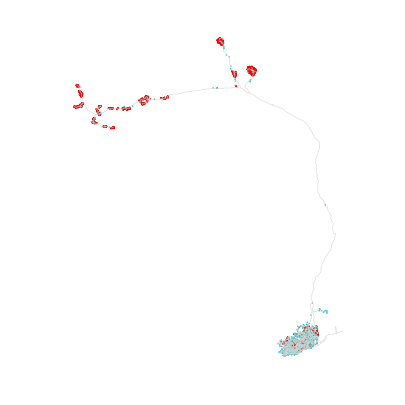

In [30]:
>>> import navis
>>> # Presynapses are red; postsynapses are light blue
>>> fig, ax = navis.plot2d(sk, connectors=True, color='lightgrey')

In [13]:
>>> # These are current root IDs of RHS DA1 uPNs
>>> da1_roots = [
...     720575940604407468,
...     720575940623543881,
...     720575940637469254,
...     720575940617229632,
...     720575940621239679,
...     720575940623303108,
...     720575940630066007,
... ]

>>> # Get the partners for these neurons
>>> edge_list = flywire.fetch_connectivity(da1_roots)
>>> edge_list.head()

Using materialization version 630


,pre,post,weight
0,720575940611174702,720575940630066007,104
1,720575940611174702,720575940621239679,89
2,720575940619061662,720575940630066007,81
3,720575940611174702,720575940637469254,78
4,720575940611174702,720575940604407468,75


In [22]:
>>> # Grab the top 30 downstream partnes
>>> top30ds = edge_list[edge_list.pre.isin(da1_roots)].iloc[:30]
>>> # Generate a URL with these partners
>>> flywire.encode_url(segments=top30ds.index.values, open=False)

'https://ngl.flywire.ai/?json_url=https://globalv1.flywire-daf.com/nglstate/5809290449256448'

In [23]:
>>> adj = flywire.fetch_adjacency(sources=da1_roots, targets=da1_roots)
>>> adj

Using materialization version 630


target,720575940604407468,720575940623543881,720575940637469254,720575940617229632,720575940621239679,720575940623303108,720575940630066007
source,,,,,,,
720575940604407468,0.0,2.0,1.0,2.0,1.0,1.0,1.0
720575940623543881,0.0,0.0,2.0,0.0,0.0,2.0,0.0
720575940637469254,0.0,2.0,0.0,3.0,0.0,1.0,1.0
720575940617229632,1.0,2.0,1.0,0.0,2.0,1.0,1.0
720575940621239679,6.0,1.0,1.0,5.0,0.0,0.0,2.0
720575940623303108,0.0,1.0,1.0,0.0,1.0,0.0,0.0
720575940630066007,0.0,4.0,0.0,1.0,3.0,0.0,0.0
